In [5]:
import pandas as pd
import numpy as np

treino = pd.read_csv('merged_treinofinal.csv')
# treino = pd.read_csv('TH.csv')

In [ ]:
treino.columns

In [6]:
#treino.columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

for c in treino.columns:
    print(f'{c} -> {treino[c].isna().sum()}')

Jornada -> 0
Dia -> 0
Data -> 0
Horário -> 0
home -> 0
xG_home -> 0
xG_away -> 0
away -> 0
Assistance -> 0
Local -> 0
Árbitro -> 0
Relatório da Partida -> 0
goals_home -> 0
goals_away -> 0
formacao_home -> 0
formacao_away -> 0
Faltas_home -> 0
Faltas_away -> 0
Escanteios_home -> 0
Escanteios_away -> 0
Cruzamentos_home -> 0
Cruzamentos_away -> 0
Contatos_home -> 0
Contatos_away -> 0
Bote defensivo_home -> 0
Bote defensivo_away -> 0
Cortes_home -> 0
Cortes_away -> 0
Defesas_home -> 0
Defesas_away -> 0
Impedimentos_home -> 0
Impedimentos_away -> 0
Tiro de meta_home -> 67
Tiro de meta_away -> 67
Bolas longas_home -> 0
Bolas longas_away -> 0
yellow_card_home -> 0
red_card_home -> 0
yellow_red_card_home -> 0
yellow_card_away -> 0
red_card_away -> 0
yellow_red_card_away -> 0
jogador1_home -> 1
jogador2_home -> 1
jogador3_home -> 1
jogador4_home -> 1
jogador5_home -> 1
jogador6_home -> 1
jogador7_home -> 1
jogador8_home -> 1
jogador9_home -> 1
jogador10_home -> 1
jogador11_home -> 1
jogador12_

In [7]:
treino['Data'] = pd.to_datetime(treino['Data']).dt.date

In [9]:
import datetime
#Horário de verão ou inverno
treino['Horario'] = 1

treino.loc[treino['Data'] < datetime.date(2023,3,26), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2022,10,30), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2022,3,27), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2021,10,31), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2021,3,28), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2020,10,25), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2020,3,29), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2019,10,27), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2019,3,31), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2018,10,28), 'Horario'] = 1

treino['hora_noite'] = pd.to_datetime(treino['hora_noite'])
treino.loc[treino['Horario'] == 1, 'hora_noite'] = treino.loc[treino['Horario'] == 1, 'hora_noite'] + pd.Timedelta(hours=1)
treino['hora_noite'] = treino['hora_noite'].dt.time

treino['Horário'] = pd.to_datetime(treino['Horário']).dt.time
treino['Noite'] = treino['Horário'] > treino['hora_noite']

In [10]:
treino['Noite'].value_counts()

False    923
True     301
Name: Noite, dtype: int64

In [11]:
treino['dif'] = treino['goals_home'] - treino['goals_away']
treino['xg_dif'] = treino['xG_home'] - treino['xG_away']

treino.loc[treino['dif']>0, 'result'] = 'H'
treino.loc[treino['dif']==0, 'result'] = 'D'
treino.loc[treino['dif']<0, 'result'] = 'A'

In [12]:
#Define o favorito
treino.loc[treino['B365H'] < 2.26, 'fav'] = 'H'
treino.loc[treino['B365H'] < 1.40, 'fav'] = 'HH'
treino.loc[treino['B365A'] < 2.26, 'fav'] = 'A'
treino.loc[treino['B365A'] < 1.40, 'fav'] = 'AA'
treino.loc[treino['fav'].isna(), 'fav'] = 'D'

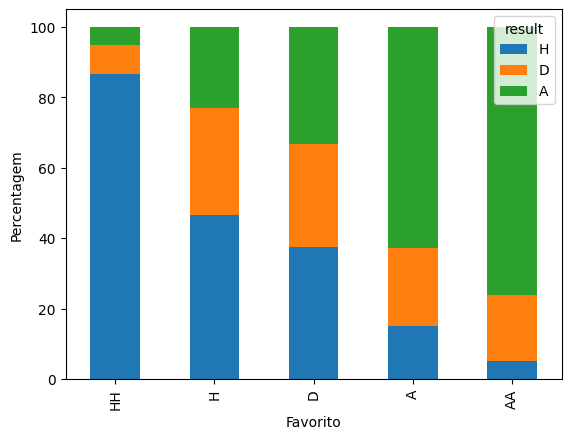

In [13]:
import matplotlib.pyplot as plt
order = ['H', 'D', 'A']
category_order = ['HH', 'H', 'D', 'A', 'AA']

# Convert 'x' column to categorical data type with the specified order
treino['fav'] = pd.Categorical(treino['fav'], categories=category_order, ordered=True)
treino['result'] = pd.Categorical(treino['result'], categories=order, ordered=True)

# Calculate the percentage of values in column 'y' for each unique value in column 'x'
result = treino.groupby('fav')['result'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
result.unstack().plot(kind='bar',stacked=True)

# Configurar os rótulos dos eixos
plt.xlabel('Favorito')
plt.ylabel('Percentagem')

# Exibir o gráfico
plt.show()

<AxesSubplot: ylabel='fav'>

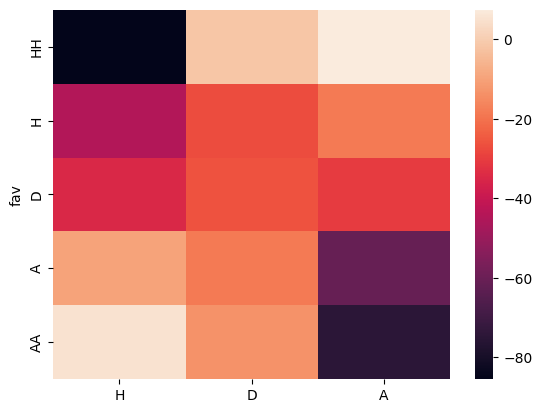

In [14]:
import seaborn as sns
#Fazer reverse ao cmap

order = ['H', 'D', 'A']

sns.heatmap(treino[['fav','B365H','B365D','B365A']].groupby('fav').mean().rename({'B365H': 'H','B365D': 'D', 'B365A': 'A'}, axis=1) - result.unstack()[order].reindex(['HH', 'H', 'D', 'A', 'AA']))

In [15]:
treino[['Horário','result']].groupby('Horário').count()

,result
Horário,
12:45:00,1
13:00:00,1
14:00:00,3
14:30:00,13
15:00:00,110
15:30:00,141
16:00:00,28
16:30:00,15
17:00:00,41


In [8]:
import requests

datas = treino['Data'].unique()

for data in datas:
    url = f'https://api.sunrise-sunset.org/json?lat=41.4500&lng=-8.3000&date={data}'
    response = requests.get(url)
    resposta = response.json()
    treino.loc[treino['Data'] == data, 'hora_noite'] = resposta['results']['astronomical_twilight_end']
    print(data)


2018-08-10
2018-08-11
2018-08-12
2018-08-13
2018-08-17
2018-08-18
2018-08-19
2018-08-20
2018-08-24
2018-08-25
2018-08-26
2018-08-27
2018-08-31
2018-09-01
2018-09-02
2018-09-21
2018-09-22
2018-09-23
2018-09-24
2018-09-27
2018-09-28
2018-09-29
2018-09-30
2018-10-01
2018-10-05
2018-10-06
2018-10-07
2018-10-26
2018-10-27
2018-10-28
2018-11-02
2018-11-03
2018-11-04
2018-11-05
2018-11-09
2018-11-10
2018-11-11
2018-11-30
2018-12-01
2018-12-02
2018-12-03
2018-12-07
2018-12-08
2018-12-09
2018-12-10
2018-12-14
2018-12-15
2018-12-16
2018-12-22
2018-12-23
2019-01-02
2019-01-03
2019-01-05
2019-01-06
2019-01-07
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-18
2019-01-19
2019-01-20
2019-01-28
2019-01-29
2019-01-30
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-15
2019-03-16

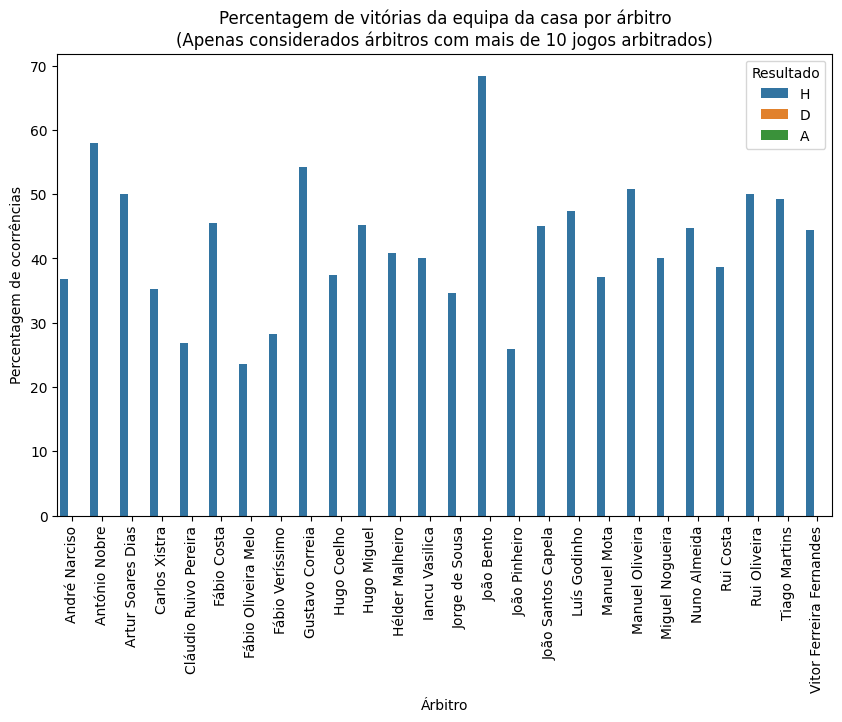

In [16]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['Árbitro'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro[counts_arbitro >= 10].index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['Árbitro'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('Árbitro')['result'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

counts = counts[counts['result'] == 'H']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Árbitro', y='Percentage', hue='result', data=counts)
plt.title('Percentagem de vitórias da equipa da casa por árbitro\n(Apenas considerados árbitros com mais de 10 jogos arbitrados)')
plt.xlabel('Árbitro')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [17]:
from scipy.stats import ttest_ind
# Testar se há evidência estatística de que a presença do árbitro João Bento influencia a favor da equipa da casa

bento = treino[treino['Árbitro'] == 'João Bento']
nao_bento = treino[treino['Árbitro'] != 'João Bento']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(bento['dif'], nao_bento['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21

t-test statistic: 1.93
p-value: 0.0269


In [18]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

bento = treino[treino['Árbitro'] == 'António Nobre']
nao_bento = treino[treino['Árbitro'] != 'António Nobre']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(bento['dif'], nao_bento['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21

t-test statistic: 2.60
p-value: 0.0047


In [19]:
treino[treino['Árbitro'] == 'António Nobre']['dif'].mean()

0.86

In [20]:
treino[treino['Árbitro'] != 'António Nobre']['dif'].mean()

0.19591141396933562

<AxesSubplot: xlabel='Assistance'>

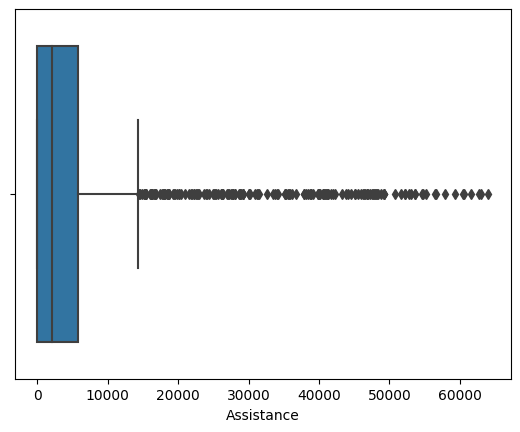

In [21]:
import seaborn as sns

sns.boxplot(x=treino['Assistance'])

In [ ]:
treino['Assistance'].describe()

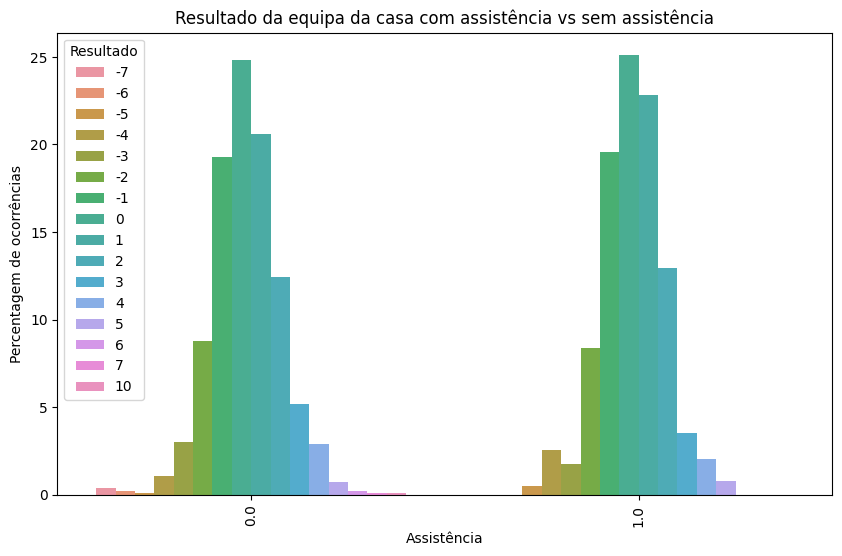

In [65]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['covid'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro.index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['covid'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('covid')['dif'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# counts = counts[counts['result'] == 'H']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='covid', y='Percentage', hue='dif', data=counts)
plt.title('Resultado da equipa da casa com assistência vs sem assistência')
plt.xlabel('Assistência')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [61]:
treino['dif'] = treino['goals_home'] - treino['goals_away']
treino['xg_dif'] = treino['xG_home'] - treino['xG_away']

treino_t1 = treino[['Data','Assistance','dif','xg_dif']].copy()

treino.loc[treino['Assistance'] == 0, 'covid'] = 1
treino.loc[treino['Assistance'] != 0, 'covid'] = 0

covid = treino[treino['covid'] == 1]
nao_covid = treino[treino['covid'] != 1]

In [62]:
# -> H0: média da dif de golos com espectadores - média da dif de golos sem espectadores = 0
# -> H1: média da dif de golos com espectadores - média da dif de golos sem espectadores > 0
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(covid['dif'], nao_covid['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.72
# p-value: 0.7645

# Não rejeitamos a hipotese nula, a presença de espectadores não afeta a diferença de golos

t-test statistic: -0.72
p-value: 0.7645


In [24]:
# -> H0: média da dif de golos com espectadores - média da dif de golos sem espectadores = 0
# -> H1: média da dif de golos com espectadores - média da dif de golos sem espectadores > 0
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(covid['xg_dif'], nao_covid['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.67
# p-value: 0.7472

# Não rejeitamos a hipotese nula

t-test statistic: -0.67
p-value: 0.7472


In [25]:
treino.loc[treino['Dia'] == 'sáb', 'FDSem'] = 1
treino.loc[treino['Dia'] == 'dom', 'FDSem'] = 1
treino.loc[treino['FDSem'].isna(), 'FDSem'] = 0

In [26]:
treino['Noite'].value_counts()

False    923
True     301
Name: Noite, dtype: int64

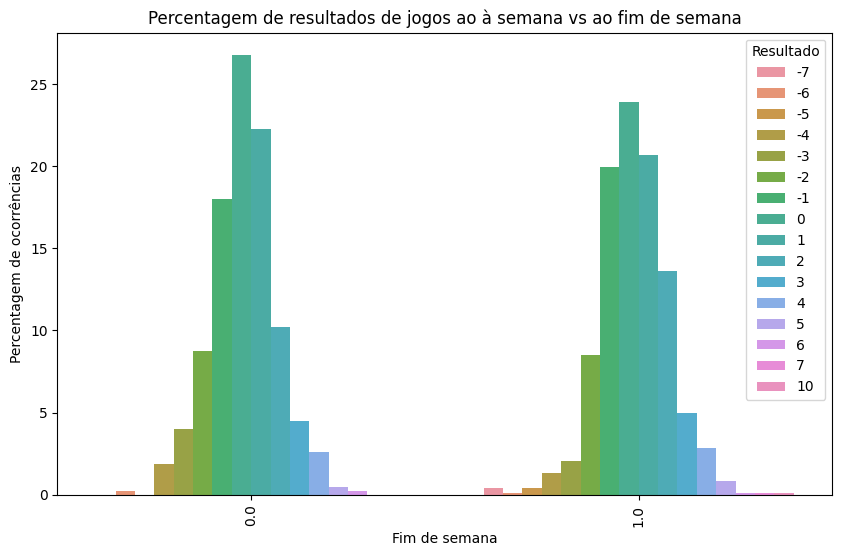

In [56]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['FDSem'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
#arbitros_filtrados = counts_arbitro[counts_arbitro >= 10].index

# Filtrar o DataFrame original com base nos árbitros filtrados
#df_filtrado = treino[treino['FDSem'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('FDSem')['dif'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

#counts = counts['fav']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='FDSem', y='Percentage', hue='dif', data=counts)
plt.title('Percentagem de resultados de jogos ao à semana vs ao fim de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

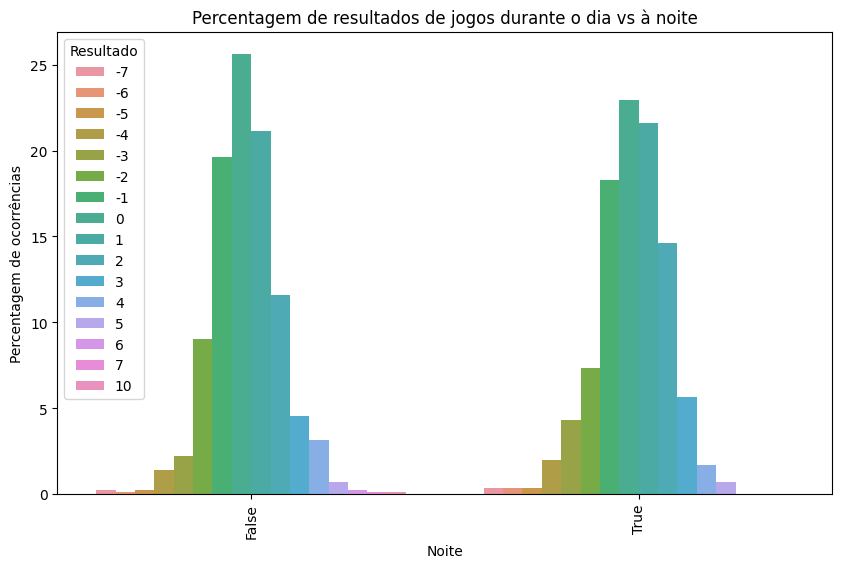

In [57]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['Noite'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
#arbitros_filtrados = counts_arbitro[counts_arbitro >= 10].index

# Filtrar o DataFrame original com base nos árbitros filtrados
#df_filtrado = treino[treino['FDSem'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('Noite')['dif'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

#counts = counts['fav']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Noite', y='Percentage', hue='dif', data=counts)
plt.title('Percentagem de resultados de jogos durante o dia vs à noite')
plt.xlabel('Noite')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [27]:
fim = treino[treino['FDSem'] == 1]
nao_fim = treino[treino['FDSem'] != 1]

noite = treino[treino['Noite'] == True]
nao_noite = treino[treino['Noite'] == False]

In [28]:
# -> H0: média da dif de golos com jogo ao fim de semana
# -> H1: média da dif de golos com jogo durante a semana
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(fim['xg_dif'], nao_fim['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.46
# p-value: 0.0722

t-test statistic: 1.46
p-value: 0.0722


In [29]:
# -> H0: média da dif de golos com jogo à noite
# -> H1: média da dif de golos com jogo durante o dia
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(noite['xg_dif'], nao_noite['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.03
# p-value: 0.5101

t-test statistic: -0.03
p-value: 0.5101


In [30]:
treino['formacao_home'].value_counts()

4-2-3-1      318
4-3-3        282
4-4-2        248
3-4-3        177
4-1-4-1       79
5-4-1         29
4-4-1-1       18
3-4-1-2       16
3-5-2         15
5-3-2         13
4-5-1          7
4-1-2-1-2      6
4-1-3-2        5
4-2-2-2        3
4-3-1-2        3
3-2-4-1        1
4-3-2-1        1
3-5-1-1        1
4-4-0          1
3-1-4-2        1
Name: formacao_home, dtype: int64

In [31]:
treino['formacao_home'].isna().sum()

0

In [33]:
seis = treino[treino['AST'] >= 6]
nao_seis = treino[treino['AST'] < 6]



In [ ]:
seis

In [34]:
# -> H0: média da dif de golos com +6 remates à baliza - média da dif de golos com -6 remates à baliza = 0
# -> H1: média da dif de golos com +6 remates à baliza - média da dif de golos com -6 remates à baliza > 0
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(seis['dif'], nao_seis['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.03
# p-value: 0.5101

# tenho de corrigir

t-test statistic: -13.72
p-value: 1.0000


In [35]:
treino.loc[treino['result'] == 'H', 'home_Points'] = 3
treino.loc[treino['result'] == 'D', 'home_Points'] = 1
treino.loc[treino['result'] == 'A', 'home_Points'] = 0
treino.loc[treino['result'] == 'A', 'away_Points'] = 3
treino.loc[treino['result'] == 'D', 'away_Points'] = 1
treino.loc[treino['result'] == 'H', 'away_Points'] = 0

for team in treino['home'].unique():
       dfHomeGames = treino[treino['home'] == team]
       dfAwayGames = treino[treino['away'] == team]
       dfTotal = pd.concat([dfHomeGames,dfAwayGames])

       dfTotal.sort_index(inplace=True)
       rows_to_update_home = dfHomeGames.index
       rows_to_update_away = dfAwayGames.index
       
       dfTotal['points'] = dfTotal.apply(lambda row: row['home_Points'] if row['home'] == team else row['away_Points'],axis=1)
       coluna = 'points'
       dfTotal[f'{coluna}_MA5'] = dfTotal[coluna].rolling(5, closed='left').mean()
       dfTotal[f'{coluna}_MA17'] = dfTotal[coluna].rolling(17, closed='left').mean()
       dfTotal[f'{coluna}_MA34'] = dfTotal[coluna].rolling(34, closed='left').mean()
       treino.loc[rows_to_update_home, f'{coluna}_home_MA5'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA5']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA5'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA5']
       treino.loc[rows_to_update_home, f'{coluna}_home_MA17'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA17']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA17'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA17']
       treino.loc[rows_to_update_home, f'{coluna}_home_MA34'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA34']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA34'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA34']


In [ ]:
treino

In [ ]:
treino['season']

In [36]:
import time
epocas = treino['season'].unique()

for epoca in epocas:
  df_epoca = treino[treino['season'] == epoca]
  # [(equipa, pontos, GM, GS)]
  clas = []
  for equipa in df_epoca['home'].unique():
    clas.append((equipa,0,0,0))
  for index, row in df_epoca.iterrows():
    treino.loc[index, 'posicao_casa'] = clas.index(list(filter(lambda x: x[0] == row['home'], clas))[0])+1
    # Buscar posicao equipa fora
    treino.loc[index, 'posicao_fora'] = clas.index(list(filter(lambda x: x[0] == row['away'], clas))[0])+1
    # Somar pontos à equipa casa
    home_cenas = clas.pop(clas.index(list(filter(lambda x: x[0] == row['home'], clas))[0]))
    clas.append((home_cenas[0], home_cenas[1] + row['home_Points'], home_cenas[2] + row['goals_home'], home_cenas[3] + row['goals_away']))
    # Somar pontos à equipa fora
    away_cenas = clas.pop(clas.index(list(filter(lambda x: x[0] == row['away'], clas))[0]))
    clas.append((away_cenas[0], away_cenas[1] + row['away_Points'], away_cenas[2] + row['goals_away'], home_cenas[3] + row['goals_home']))
    # ordenar clas
    clas = sorted(clas, key=lambda x: (x[1], x[2]-x[3], x[2]), reverse=True)

In [ ]:
treino

In [37]:
treino['equipa_favorita'] = np.where(treino['B365H']>treino['B365A'], 'A', 'H')
treino['favorito_venceu'] = np.where(treino['equipa_favorita'] == treino['result'], 1, 0)

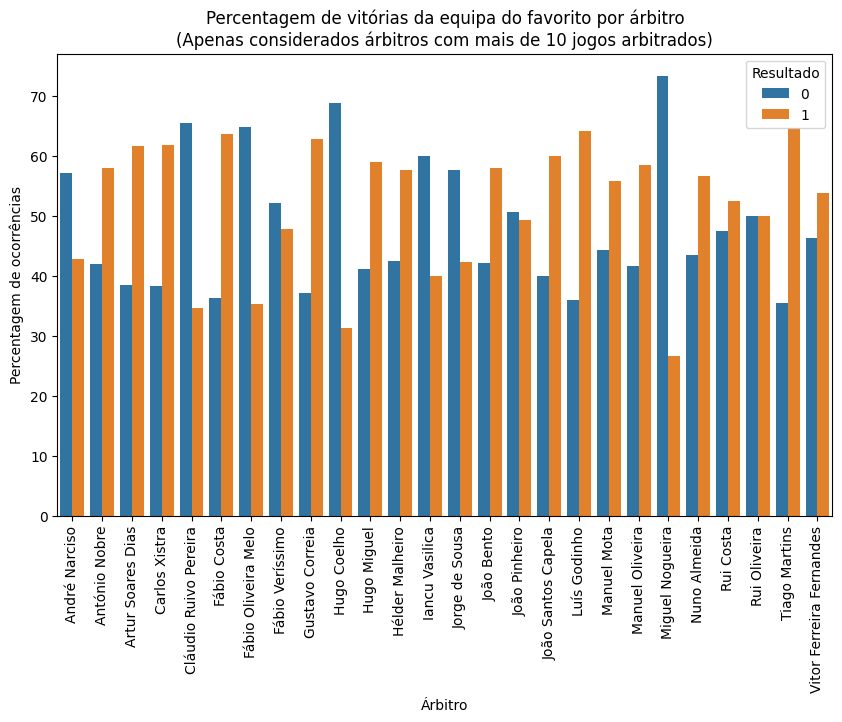

In [38]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['Árbitro'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro[counts_arbitro >= 10].index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['Árbitro'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('Árbitro')['favorito_venceu'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

#counts = counts['fav']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Árbitro', y='Percentage', hue='favorito_venceu', data=counts)
plt.title('Percentagem de vitórias da equipa do favorito por árbitro\n(Apenas considerados árbitros com mais de 10 jogos arbitrados)')
plt.xlabel('Árbitro')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [39]:
treino[treino['Árbitro'] == 'Miguel Nogueira']['result']

639     D
685     D
712     H
741     A
784     H
925     H
965     D
980     D
1044    D
1064    D
1090    H
1115    A
1142    D
1175    H
1204    H
Name: result, dtype: category
Categories (3, object): ['H' < 'D' < 'A']

In [40]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

nogueira = treino[treino['Árbitro'] == 'Miguel Nogueira']
nao_nogueira = treino[treino['Árbitro'] != 'Miguel Nogueira']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(nao_nogueira['favorito_venceu'], nogueira['favorito_venceu'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21
#ta mal

t-test statistic: 2.15
p-value: 0.0160


In [41]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

martins = treino[treino['Árbitro'] == 'Tiago Martins']
nao_martins = treino[treino['Árbitro'] != 'Tiago Martins']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(martins['favorito_venceu'], nao_martins['favorito_venceu'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21

t-test statistic: 1.75
p-value: 0.0401


In [42]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

hugo = treino[treino['Árbitro'] == 'Hugo Coelho']
nao_hugo = treino[treino['Árbitro'] != 'Hugo Coelho']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(nao_hugo['favorito_venceu'], hugo['favorito_venceu'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Despromovido

t-test statistic: 1.85
p-value: 0.0326


In [43]:
treino[treino['Árbitro'] == 'Hugo Coelho']

,Jornada,Dia,Data,Horário,home,xG_home,xG_away,away,Assistance,Local,Árbitro,Relatório da Partida,goals_home,goals_away,formacao_home,formacao_away,Faltas_home,Faltas_away,Escanteios_home,Escanteios_away,Cruzamentos_home,Cruzamentos_away,Contatos_home,Contatos_away,Bote defensivo_home,Bote defensivo_away,Cortes_home,Cortes_away,Defesas_home,Defesas_away,Impedimentos_home,Impedimentos_away,Tiro de meta_home,Tiro de meta_away,Bolas longas_home,Bolas longas_away,yellow_card_home,red_card_home,yellow_red_card_home,yellow_card_away,red_card_away,yellow_red_card_away,jogador1_home,jogador2_home,jogador3_home,jogador4_home,jogador5_home,jogador6_home,jogador7_home,jogador8_home,jogador9_home,jogador10_home,jogador11_home,jogador12_home,jogador13_home,jogador14_home,jogador15_home,jogador16_home,jogador17_home,jogador1_away,jogador2_away,jogador3_away,jogador4_away,jogador5_away,jogador6_away,jogador7_away,jogador8_away,jogador9_away,jogador10_away,jogador11_away,jogador12_away,jogador13_away,jogador14_away,jogador15_away,jogador16_away,jogador17_away,HS,AS,HST,AST,B365H,B365D,B365A,HTHG,HTAG,season,jogador18_home,jogador18_away,jogador19_away,jogador19_home,jogador20_away,jogador20_home,hora_noite,Horario,Noite,dif,xg_dif,result,fav,FDSem,home_Points,away_Points,points_home_MA5,points_away_MA5,points_home_MA17,points_away_MA17,points_home_MA34,points_away_MA34,posicao_casa,posicao_fora,equipa_favorita,favorito_venceu
648,5.0,sáb,2020-10-24,15:30:00,Nacional,0.4,0.8,Pacos Ferreira,0.0,Estádio da Madeira,Hugo Coelho,/pt/partidas/277408b0/Nacional-Pacos-de-Ferrei...,1,1,4-1-4-1,4-3-3,23.0,9.0,3.0,6.0,14.0,20.0,540.0,499.0,15.0,18.0,14.0,13.0,23.0,15.0,4.0,3.0,12.0,6.0,77.0,86.0,3.0,1.0,0.0,1.0,0.0,0.0,Daniel Guimarães,Lucas Kal,Pedrão,João Pedro Gomes Camacho,Kenji Gorré,Rúben Micael,Witi,Rúben Freitas,Vincent Thill,Nuno Borges,Brayan Riascos,Riccardo Piscitelli,Larry Azouni,Abdullahi Ibrahim Alhassan,Vladan Danilović,Gergely Bobál,Bryan Róchez,Jordi Almeida,Marco Baixinho,Oleg Reabciuk,Bruno Xavier Almeida Costa,Luther Singh,Luíz Carlos,Fernando Ferreira Fonseca,Marcelo dos Santos Ferreira,Stephen Eustáquio,João Amaral,Douglas Tanque,Michael,Martín,Hélder Ferreira,Zé Uilton,Adriano Castanheira,Dor Jan,7,18,2,6,2.62,3.10,2.75,0,0,2020-21,Julio,Lucas Silva,Lamine Diaby,João Victor,NaN,NaN,20:11:20,1,False,0,-0.4,D,D,1.0,1.0,1.0,1.0,1.0,0.764706,1.588235,0.882353,1.235294,12.0,14.0,H,0
717,12.0,seg,2021-01-04,19:00:00,Gil Vicente,0.6,0.3,Belenenses,0.0,Estádio Cidade de Barcelos,Hugo Coelho,/pt/partidas/fd58357d/Gil-Vicente-FC-Belenense...,0,0,4-3-3,3-4-3,10.0,19.0,8.0,3.0,29.0,15.0,593.0,549.0,10.0,11.0,11.0,16.0,16.0,23.0,1.0,0.0,8.0,6.0,94.0,68.0,2.0,0.0,0.0,1.0,0.0,0.0,Brian Araújo,Joel Pereira,Rodrigão,Lourency,Claude Gonçalves,Antoine Léautey,Vitor Carvalho,Lucas Mineiro,Rúben Fernandes,Samuel,Talocha,Daniel Fuzato,Alaa Abbas,Renan,Kanya Fujimoto,Yves Baraye,Leandrinho,Stanislav Kritsyuk,Diogo Calila,Rúben Lima,Silvestre Varela,Miguel Filipe Nunes Cardoso,Tiago Esgaio,Danny Henriques,Sphephelo Sithole,Afonso Taira,Afonso Sousa,Gonçalo Silva,Guilherme Mata Oliveira,Luca van der Gaag,Bruno Ramires,Edi Semedo,Cauê Cecilio da Silva,Mateo Cassierra,13,7,5,1,2.15,3.10,3.75,0,0,2020-21,Tim Hall,Robinho Vieira,Francisco Chico,Henrique Gomes,NaN,NaN,18:56:10,0,True,0,0.3,D,H,0.0,1.0,1.0,1.4,1.0,1.294118,0.941176,1.235294,1.029412,11.0,15.0,H,0
750,16.0,seg,2021-02-01,16:00:00,Santa Clara,1.3,0.5,Belenenses,0.0,Estádio de São Miguel,Hugo Coelho,/pt/partidas/7396c4d9/Santa-Clara-Belenenses-S...,2,0,4-2-3-1,3-4-1-2,25.0,18.0,2.0,2.0,7.0,23.0,394.0,582.0,16.0,21.0,8.0,7.0,25.0,10.0,1.0,1.0,12.0,7.0,84.0,64.0,3.0,0.0,0.0,2.0,0.0,0.0,Marco André Rocha Pereira,Rafael Ramos,Mikel Villanueva,Fábio Cardoso,Mansur,Allano,Lincoln,Carlos,Rui Filipe Cunha Correia,Crysan,Hidemasa Morita,André Ferreira,João Afonso,João Paulo Lázaro Lucas,Ukra,Jean Patric,Anderson Carvalho,Stanislav Kritsyuk,Rúben Lima,Bruno Ramires,Mateo Cassierra,Tiago Esgaio,Danny Henriqu

In [44]:
treino['yellow_card_fav'] = treino.apply(lambda row: row['yellow_card_home'] if row['favorito_venceu'] == 1 else row['yellow_card_away'],axis=1)

In [45]:
treino['yellow_card_fav'].describe()

count    1224.000000
mean        2.604575
std         1.547454
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: yellow_card_fav, dtype: float64

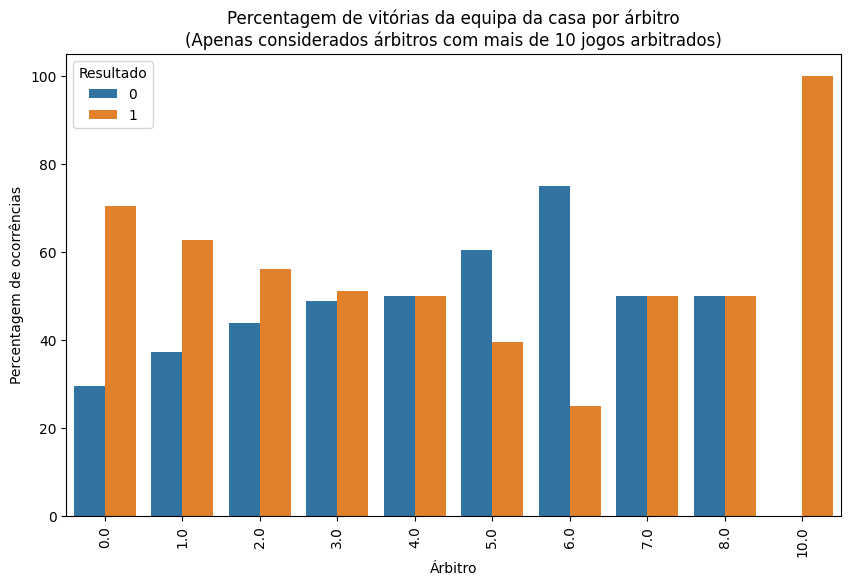

In [46]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['yellow_card_fav'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro.index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['yellow_card_fav'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('yellow_card_fav')['favorito_venceu'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# counts = counts[counts['result'] == 'H']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='yellow_card_fav', y='Percentage', hue='favorito_venceu', data=counts)
plt.title('Percentagem de vitórias da equipa da casa por árbitro\n(Apenas considerados árbitros com mais de 10 jogos arbitrados)')
plt.xlabel('Árbitro')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [47]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

seisy = treino[treino['yellow_card_fav'] == 6]
nao_seisy = treino[treino['yellow_card_fav'] != 6]

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(nao_seisy['favorito_venceu'], seisy['favorito_venceu'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# Só precisamos de perceber se estes amarelos são depois de golos sofridos ou não

# t-test statistic: 1.93
# p-value: 0.0269

t-test statistic: 3.57
p-value: 0.0002


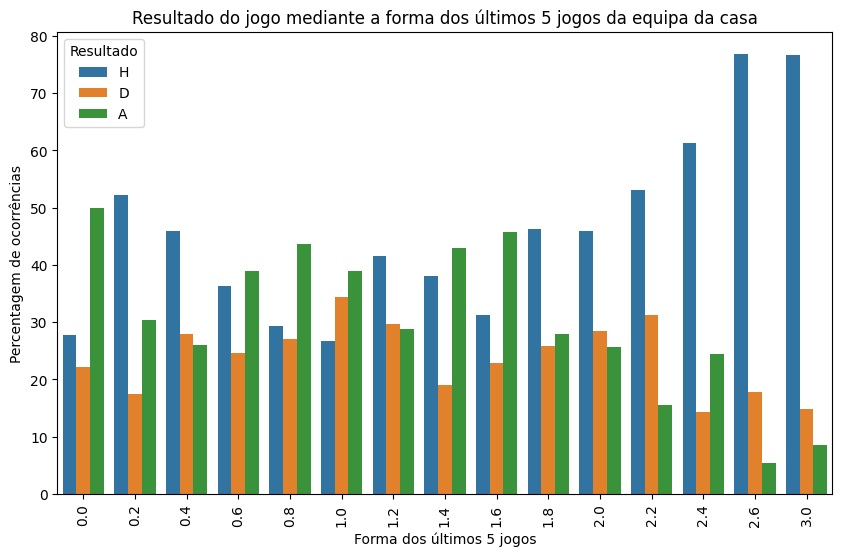

In [60]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['points_home_MA5'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro.index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['points_home_MA5'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('points_home_MA5')['result'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# counts = counts[counts['result'] == 'H']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='points_home_MA5', y='Percentage', hue='result', data=counts)
plt.title('Resultado do jogo mediante a forma dos últimos 5 jogos da equipa da casa')
plt.xlabel('Forma dos últimos 5 jogos')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [49]:
zerodois = treino[treino['points_home_MA5'] == 0.2]
zerodois

,Jornada,Dia,Data,Horário,home,xG_home,xG_away,away,Assistance,Local,Árbitro,Relatório da Partida,goals_home,goals_away,formacao_home,formacao_away,Faltas_home,Faltas_away,Escanteios_home,Escanteios_away,Cruzamentos_home,Cruzamentos_away,Contatos_home,Contatos_away,Bote defensivo_home,Bote defensivo_away,Cortes_home,Cortes_away,Defesas_home,Defesas_away,Impedimentos_home,Impedimentos_away,Tiro de meta_home,Tiro de meta_away,Bolas longas_home,Bolas longas_away,yellow_card_home,red_card_home,yellow_red_card_home,yellow_card_away,red_card_away,yellow_red_card_away,jogador1_home,jogador2_home,jogador3_home,jogador4_home,jogador5_home,jogador6_home,jogador7_home,jogador8_home,jogador9_home,jogador10_home,jogador11_home,jogador12_home,jogador13_home,jogador14_home,jogador15_home,jogador16_home,jogador17_home,jogador1_away,jogador2_away,jogador3_away,jogador4_away,jogador5_away,jogador6_away,jogador7_away,jogador8_away,jogador9_away,jogador10_away,jogador11_away,jogador12_away,jogador13_away,jogador14_away,jogador15_away,jogador16_away,jogador17_away,HS,AS,HST,AST,B365H,B365D,B365A,HTHG,HTAG,season,jogador18_home,jogador18_away,jogador19_away,jogador19_home,jogador20_away,jogador20_home,hora_noite,Horario,Noite,dif,xg_dif,result,fav,FDSem,home_Points,away_Points,points_home_MA5,points_away_MA5,points_home_MA17,points_away_MA17,points_home_MA34,points_away_MA34,posicao_casa,posicao_fora,equipa_favorita,favorito_venceu,yellow_card_fav
53,6.0,seg,2018-10-01,20:15:00,Aves,1.4,1.4,Portimonense,1911.0,Estádio Clube Desportivo das Aves,João Pinto,/pt/partidas/ee033c51/Aves-Portimonense-2018Ou...,3,0,4-2-3-1,4-3-3,12.0,10.0,6.0,5.0,23.0,21.0,438.0,676.0,19.0,20.0,15.0,15.0,26.0,30.0,2.0,0.0,10.0,7.0,90.0,62.0,2.0,0.0,0.0,1.0,0.0,0.0,Quentin Beunardeau,Rodrigo Alves Soares,Rodrigo Defendi,Vitor Costa,Rúben Alexandre Gomes Oliveira,Hamdou Elhouni,Carlos Ponck,Vítor Gomes,Issam El Adoua,Mama Samba Baldé,Bruno Gomes,André Ferreira,Nélson Lenho,Mato Miloš,Amilton,Claudio Falcão,Derley,Leonardo Navacchio,Lucas Possignolo,Emmanuel Hackman,Paulinho,Shoya Nakajima,Bruno Tabata,Ewerton,João Carlos,Pedro Sá,Rúben Fernandes,Guilherme Lazaroni,Ricardo Abel Barbosa Ferreira,Marcel,Dener,Jackson Martínez,Lucas Fernandes,Wellington,12,17,4,2,2.62,3.20,2.70,1,0,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,20:47:48,1,False,3,0.0,H,D,0.0,3.0,0.0,0.2,0.8,NaN,NaN,NaN,NaN,18.0,16.0,H,1,2.0
60,7.0,dom,2018-10-07,15:00:00,Boavista,1.5,1.1,Aves,4331.0,Estádio do Bessa Século XXI,Vitor Ferreira Fernandes,/pt/partidas/27d70f72/Boavista-Aves-2018Outubr...,1,0,4-2-3-1,4-2-3-1,12.0,23.0,11.0,4.0,26.0,13.0,460.0,445.0,20.0,25.0,12.0,13.0,20.0,31.0,1.0,2.0,10.0,12.0,87.0,90.0,3.0,0.0,0.0,4.0,0.0,0.0,Helton Leite,Gonçalo Cardoso,Nwankwo Obiora,Talocha,Rochinha,David Simão,Fábio Espinho,Carraça,Neris,Índio,Rafael Lopes,Rafael Bracalli,Mateus Galiano da Costa,Koneh Ibrahim,Edu Machado,Rafael Costa,Federico Falcone,Quentin Beunardeau,Rodrigo Alves Soares,Vitor Costa,Rúben Alexandre Gomes Oliveira,Amilton,Carlos Ponck,Vítor Gomes,Issam El Adoua,Diego Galo,Mama Samba Baldé,Bruno Gomes,André Ferreira,Bruno Manuel Araújo Braga,Luis Fariña,Nélson Lenho,Mato Miloš,Claudio Falcão,20,11,5,2,2.00,3.40,3.75,0,0,2018-19,NaN,NaN,NaN,NaN,NaN,NaN,20:37:32,1,False,1,0.4,H,H,1.0,3.0,0.0,0.2,0.8,NaN,NaN,NaN,NaN,18.0,16.0,H,1,3.0
96,11.0,dom,2018-12-02,17:30:00,Chaves,0.6,1.8,Guimaraes,5980.0,Estádio Municipal Eng. Manuel Branco Tei...,João Santos Capela,/pt/partidas/a86d37b7/Chaves-Vitoria-Guimaraes...,0,1,4-3-3,4-3-3,12.0,17.0,8.0,4.0,26.0,17.0,579.0,543.0,18.0,12.0,16.0,16.0,15.0,34.0,2.0,4.0,5.0,10.0,65.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,Ricardo Jorge Novo Nunes,Paulo Sérgio Mota,Hugo Basto,Stephen Eustáquio,Jeferson Fernandes Macedo,Renan Bardini Bressan,André Luis,Luís Martins,Marcão,Bruno Gallo,Platiny,António Filipe de Carvalho,Jefferson de Jesus Santos,Avtandil Ebralidze,Gevorg Ghazaryan,William,Niltinho,Douglas,Pedrão,Rafa Soares,Alexandre Guedes,André André,Mattheus Oliveira,Falaye Sacko,Tozé,Yordan 

In [50]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

zerodois = treino[treino['points_home_MA5'] == 0.2]
nao_zerodois = treino[treino['points_home_MA5'] != 0.2]

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(zerodois['dif'], nao_zerodois['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# Só precisamos de perceber se estes amarelos são depois de golos sofridos ou não

# t-test statistic: 1.93
# p-value: 0.0269

t-test statistic: 0.91
p-value: 0.1811


In [ ]:
treino.to_csv('final.csv')